A/B Testing is used for testing the effectiveness of two (or more) different digital marketing strategies for a new product. It helps by comparing metrics calculated for the different business strategies using hypothesis testing techniques.

Based on the result decision makers can act on implemnting a strategy accordingly. 



#### Dataset background

A fast-food chain plans on adding a new item to its menu. However, they are unsure about which of the three possible marketing campaigns for promoting the new product would work best. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.[1]

#### Goal

The goal of this notebook is complete A/B testing for the fast food chain to show them which of the marketing strategies works best for the new item they want to add.

This will be done through hypothesis testing. Prior to that, we need to make sure the data is representative of teh entire population. We do this by analyzing the individual columns and when are certain that the data is well distributed, we can then go on with carrying out our hypothesis testing.

We start by loading and analysing the dataset

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_ff = pd.read_csv("WA_Marketing-Campaign.csv")

In [9]:
df_ff.sample(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
399,8,Medium,705,22,3,4,47.35
27,1,Medium,7,15,1,4,36.17
187,4,Small,306,13,1,4,65.12
112,3,Large,210,19,1,1,85.11
149,3,Large,219,7,2,2,82.86


In [41]:
df_ff.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [4]:
df_ff.shape

(548, 7)

In [5]:
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [7]:
df_ff.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


### Exploring the data

In [10]:
df_ff['MarketSize'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [11]:
df_ff['Promotion'].unique()

array([3, 2, 1])

In [17]:
# Analysing sales based on promotion
df_sales = df_ff.groupby('Promotion').agg({'SalesInThousands': 'sum'})

In [25]:
df_sales['%'] = round(df_sales['SalesInThousands'] / df_sales['SalesInThousands'].sum() * 100)

In [26]:
df_sales.head()

,SalesInThousands,%
Promotion,,
1,9993.03,34.0
2,8897.93,30.0
3,10408.52,36.0


In [30]:
pie_labels = ['Promotion ' + str(i) for i in df_sales.index]
pie_labels

['Promotion 1', 'Promotion 2', 'Promotion 3']

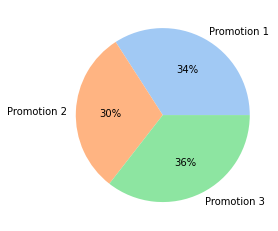

In [40]:
data = df_sales['SalesInThousands']

palette_color = sns.color_palette('pastel')
plt.pie(data, labels = pie_labels, colors = palette_color, autopct = '%.0f%%')
plt.show()

Notice that Promotion 3 has had the maximum sales in all locations put together across the 4 weeks. That being said the other two promotions are not far behind, and are approximately one third of the total sales. 

Moving to the next step, we now analyse the most popular market size for each promotion. 

In [44]:
df_marketsize = df_ff.groupby(['Promotion', 'MarketSize']).agg({'MarketSize' : 'count'})

In [45]:
df_marketsize

MarketSize
Promotion MarketSize            
1         Large               56
          Medium              96
          Small               20
2         Large               64
          Medium             108
          Small               16
3         Large               48
          Medium             116
          Small               24

<Figure size 1440x1440 with 0 Axes>

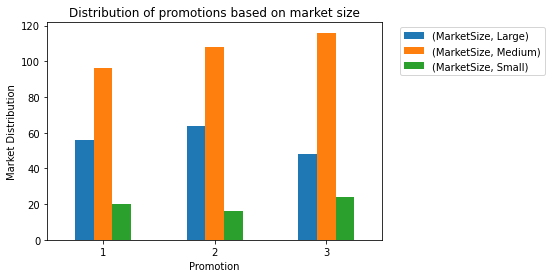

In [66]:
plt.figure(figsize = (20,20))
df_marketsize.unstack().plot(kind = 'bar')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel("Market Distribution")
plt.title("Distribution of promotions based on market size")
plt.xticks(rotation = 0)
plt.show()


We can see that the locations where the promotions have been introduced, majority of them fall under the medium market size category, whereas only few of them belong to the small market size.

Having analyzed the sales based on promotions, and distribution of promotions based on market size, we look at the next important column in the data set - the age of the store. 


In [67]:
df_age = df_ff.groupby('AgeOfStore').agg({'AgeOfStore' : 'count'})

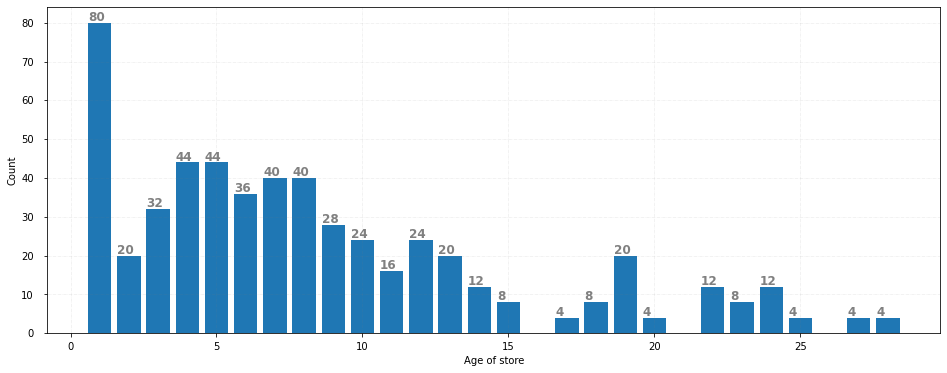

In [95]:
fig, ax = plt.subplots(figsize = (16,6))
plt.bar(df_age.index, df_age['AgeOfStore'])
plt.xlabel('Age of store')
plt.ylabel('Count')

# add padding between labels and axes
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

# annotating the bars in the plot
for i in ax.patches:
    plt.text(i.get_x(), i.get_height() + 0.5, 
            str(round(i.get_height(),2)), 
            fontsize = 12, fontweight = 'bold', 
            color = 'grey')
plt.show()

Note that a majority of the stores are less than 10 years old and most are a year old. Next we analyse the distribution of the age of stores among different promotion groups.

In [121]:
df_ff["AgeOfStore"].groupby(df_ff["Promotion"]).describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Looking at the count we see that the stores are more or less evenly distributed across different promotion strategies, this tells us that the data is fairly distributed. Additionally on an average most of the stores are on an average between 8 - 9 years old. A majority of the stores are under 12 years old based on the 75th percentile. 

We next move on to performing the hypothesis tests. We will do a one way ANOVA test to see which of the promotion strategies has the most impact on sales. 

We go about the hypothesis test as follows : 

 - Plot the Q-Q plots to see if the data is normally distributed acorss the promotion groups.
 - Perform a One Way ANOVA test to check p value and f statistic
 - Complete a post-hoc test - tukey test to see between which group does the difference lie if there is one at all.
 


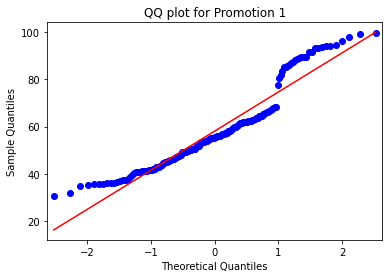

In [125]:
# Checking for normal distribution of data : 
from statsmodels.graphics.gofplots import qqplot

qqplot(np.array(df_ff[df_ff['Promotion'] == 1]['SalesInThousands']), line = 's')
plt.title('QQ plot for Promotion 1')
plt.show()

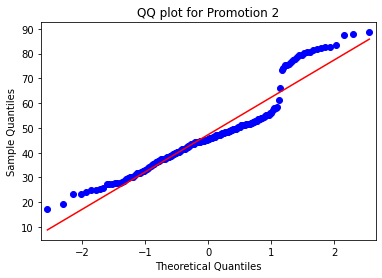

In [127]:
qqplot(np.array(df_ff[df_ff['Promotion']== 2]['SalesInThousands']), line = 's')
plt.title('QQ plot for Promotion 2')
plt.show()

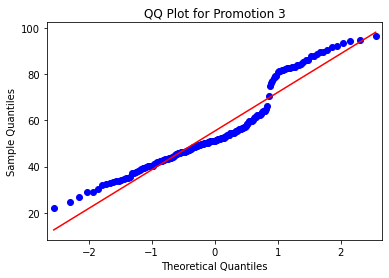

In [128]:
qqplot(np.array(df_ff[df_ff['Promotion']==3]['SalesInThousands']), line = 's')
plt.title('QQ Plot for Promotion 3')
plt.show()

Looking at the QQ plots they dont seem to be on a straight line which gives the impression that the data may not be normally distributed. We can verify this by additionally plotting the histogram and performing the Shapiro test on each of the data samples. 

The Shapiro test assumes that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.

p > alpha: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

Reference - 
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/


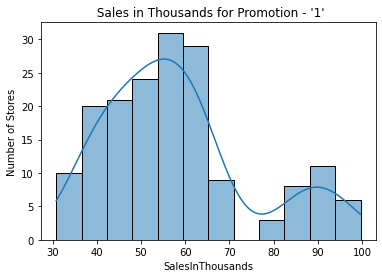

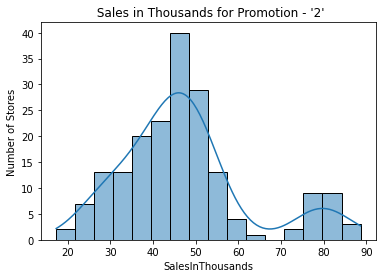

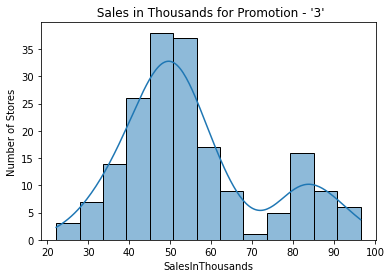

In [142]:
for i in range(1,4):
    _ = sns.histplot(data = df_ff[df_ff["Promotion"] == i], x = "SalesInThousands", kde = True)
    _ = plt.title(f" Sales in Thousands for Promotion - '{i}'")
    _ = plt.ylabel("Number of Stores")
    plt.show()

We see that the distribution of sales for each promotion group is not normal. We perform the Shapiro test next to confirm this. 

In [131]:
#Performing Shapiro test on the individual samples : 
import scipy.stats as stats

stats.shapiro(df_ff[df_ff['Promotion'] == 1]['SalesInThousands'])

ShapiroResult(statistic=0.9152998328208923, pvalue=1.977244323825289e-08)

In [133]:
stats.shapiro(df_ff[df_ff['Promotion'] == 2]['SalesInThousands'])

ShapiroResult(statistic=0.9145088791847229, pvalue=5.456262108793908e-09)

In [134]:
stats.shapiro(df_ff[df_ff['Promotion']==3]['SalesInThousands'])

ShapiroResult(statistic=0.9207685589790344, pvalue=1.499518376135711e-08)

We see that each of the three tests above give a p - value of less than 0.05 implying that the sample data sets are not normal. Hence we will have to use non-paramateric tests / methods to see if there is a significant difference between the means of the groups.

We use the Kruskal Wallis Test to test if the medians of the sales across the three promotion groups are the same.

If the p-value is less than 0.05, we can reject the null hypothesis that the median sales is the same for all three promotion groups. 


Reference - 
https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kruskal-wallis/

In [135]:
stats.kruskal(df_ff[df_ff['Promotion'] == 1]['SalesInThousands'],
              df_ff[df_ff['Promotion'] == 2]['SalesInThousands'],
              df_ff[df_ff['Promotion'] == 3]['SalesInThousands'])

KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)

As the pvalue of the test is less than 0.05 we can conclude that the medians of the sales are not the same for the three promotion groups. Alterntively there is significant impact in sales based on which Promotion group is applied. 

Now that we have established that there is a difference, in the medians across the three sales groups, we will have to find out which group performs the best. 
We do the posthoc conover test to analyze this - as we are testign for a significance difference in medians. 

While the Kruskall- Wallis test tells us if there is a statistically significant difference in the groups or not, the posthoc conover test is a test done after the Kruskal Wallis test that checks for significant difference between specific groups.

In [144]:
!pip install scikit_posthocs

In [156]:
# using pairwise_tukey to test statistical significance
import scikit_posthocs as sp


conover_test = sp.posthoc_conover(df_ff, val_col = 'SalesInThousands', group_col = 'Promotion')
print(conover_test)

              1             2             3
1  1.000000e+00  5.946071e-13  3.875411e-02
2  5.946071e-13  1.000000e+00  8.487763e-08
3  3.875411e-02  8.487763e-08  1.000000e+00


Analysing the table above we see that - comparing the medians of Promotion group 1, 2 and 3 the p value is less than 0.05 for all three promotion groups, implying that we can we can reject the null hypotheis that the medians are from the same population. That is, the promotion strategy being applied has an impact on the promotion strategy on the sales. 

Plotting the p values as a heat map

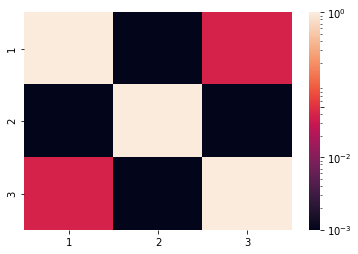

In [170]:
from matplotlib.colors import LogNorm
ax = sns.heatmap(conover_test, norm = LogNorm(vmin = 0.001, vmax = 1), vmin = 0, vmax = 1)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.001, 0.01, 0.05, 1])



Comparing the median sales for each of the promotion groups as a percentage of the total sales for that group.

In [171]:
def sales_ratio(df, promo):
    promo_median = df[df['Promotion'] == promo]['SalesInThousands'].median()
    total_promo_sales = df[df['Promotion'] == promo]['SalesInThousands'].sum()
    return promo_median / total_promo_sales * 100

In [172]:
promo_1 = sales_ratio(df_ff, 1)
promo_2 = sales_ratio(df_ff, 2)
promo_3 = sales_ratio(df_ff, 3)



In [173]:
print(f"Difference in sales betweem promotions 1 and 2 is {round(promo_1 - promo_2, 2)}%")
print(f"Difference in sales betweem promotions 1 and 3 is {round(promo_1 - promo_3, 2)}%")
print(f"Difference in sales betweem promotions 2 and 3 is {round(promo_2 - promo_3, 2)}%")

Difference in sales betweem promotions 1 and 2 is 0.04%
Difference in sales betweem promotions 1 and 3 is 0.06%
Difference in sales betweem promotions 2 and 3 is 0.02%


It appears that Promotion 1 outperforms 2 and 3 by a narrow margin and we can make this as a recomendation to the customer.

[1] https://www.kaggle.com/code/chebotinaa/a-b-testing-of-fast-food-marketing-campaign/notebook

[2]https://www.kaggle.com/code/rucheiitr/a-b-testing-fast-food-marketing-campaign